In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import thinkstats2
import pandas as pd
import thinkplot
import numpy as np

### Variables used in vehicle data set:

-	id (vehicle record id)
-	city08U (unrounded city MPG for fuelType1)
-	cityA08U (unrounded city MPG for fuleType2)
-	fuelType1 (fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel)
-	fuelType2 (fuel type 2. For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electric, etc) for single fuel vehicles this field is not used)
-	year (model year)
-	highway08U (unrounded highway MPG for fuelType1)
-	highwayA08U (unrounded highway MPG for fuelType2)
-	ghgScore (EPA GHG score, -1 = Not available)
-	ghgScoreA (EPA GHG score for dual fuel vehicle running on the alternative fuel, -1 = Not available)


### Variables used in emissions data set:

-	id (vehicle record id, links emission data to the vehicle record)
-	score (EPA 1-10 smog rating for fuelType1)
-	scoreAlt (EPA 1-10 smog rating for fuelType2)

In [4]:
# Read data sets and merge them into one data frame
vehicles_df = pd.read_excel(r'C:\Users\runek\OneDrive\Documents\GitHub\ThinkStats2\Final Project\vehicles.xlsx')
emissions_df = pd.read_excel(r'C:\Users\runek\OneDrive\Documents\GitHub\ThinkStats2\Final Project\emissions.xlsx')
vehicle_emissions_df = pd.merge(vehicles_df, emissions_df, on="id")

## Analyzing the Year Variable

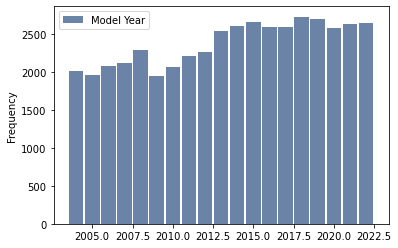

<Figure size 576x432 with 0 Axes>

In [5]:
# Year histogram

year_hist = thinkstats2.Hist(vehicle_emissions_df.year, label = 'Model Year')
thinkplot.Hist(year_hist)
thinkplot.Show(xlable = 'Model Year', ylabel = 'Frequency')

In [6]:
# Check for outliers by showing smallest ten years
for year, freq in year_hist.Smallest(10):
    print(year, freq)

2004 2015
2005 1963
2006 2071
2007 2117
2008 2290
2009 1943
2010 2061
2011 2212
2012 2264
2013 2533


In [7]:
# Check for outliers by showing largest ten years
for year, freq in year_hist.Largest(10):
    print(year, freq)

2022 2641
2021 2632
2020 2577
2019 2689
2018 2724
2017 2592
2016 2586
2015 2649
2014 2602
2013 2533


In [8]:
# Check year mean, variance, and standard deviation

mean = vehicle_emissions_df.year.mean()
var = vehicle_emissions_df.year.var()
std = vehicle_emissions_df.year.std()

mean, var, std

(2013.5649343460066, 29.26514238330448, 5.409726645894826)

## Analyzing the EPA and GHG Score Variables

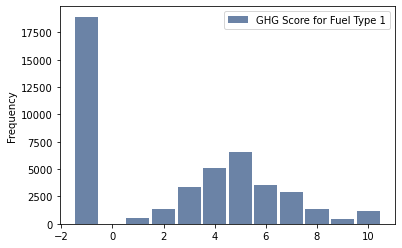

<Figure size 576x432 with 0 Axes>

In [9]:
# GHG Score (fuel type 1) Histogram
ghgScore_hist = thinkstats2.Hist(vehicle_emissions_df.ghgScore, label = 'GHG Score for Fuel Type 1')
thinkplot.Hist(ghgScore_hist)
thinkplot.Show(xlable = 'GHG Score', ylabel = 'Frequency')

Notice that there are a LOT of -1 scores. According to the data set documentation, a -1 indicates that there was not data available for this attirbute. They will need to be removed. The same can be said for the other GHG scores and EPA scores. Histograms for those will be left out for brevity's sake.

In [14]:
# Find outliers by searching for smallest ten and largest ten scores
for score, freq in ghgScore_hist.Largest(10):
    print(score, freq)

10 1171
9 432
8 1347
7 2863
6 3569
5 6603
4 5087
3 3336
2 1313
1 504


In [15]:
for score, freq in ghgScore_hist.Smallest(10):
    print(score, freq)

-1 18936
1 504
2 1313
3 3336
4 5087
5 6603
6 3569
7 2863
8 1347
9 432


Notice that we have a lot of -1 scores in the GHG Score and EPA Smog Score. -1 denotes that data was not available for those records. To perform good analysis, these will need to be removed.

In [16]:
# Let's remove all the -1 scores for the environmental ratings
def Clean_Scores(vehicle_emissions_df):
    na_val = [-1]
    vehicle_emissions_df.ghgScore.replace(na_val, np.nan, inplace = True)
    vehicle_emissions_df.ghgScoreA.replace(na_val, np.nan, inplace = True)
    vehicle_emissions_df.score.replace(na_val, np.nan, inplace = True)
    vehicle_emissions_df.scoreAlt.replace(na_val, np.nan, inplace = True)

In [18]:
Clean_Scores(vehicle_emissions_df)

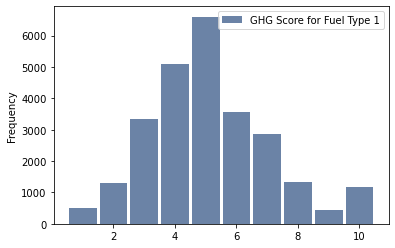

<Figure size 576x432 with 0 Axes>

In [19]:
ghgScore_hist_cleaned = thinkstats2.Hist(vehicle_emissions_df.ghgScore, label = 'GHG Score for Fuel Type 1')
thinkplot.Hist(ghgScore_hist_cleaned)
thinkplot.Show(xlable = 'GHG Score', ylabel = 'Frequency')

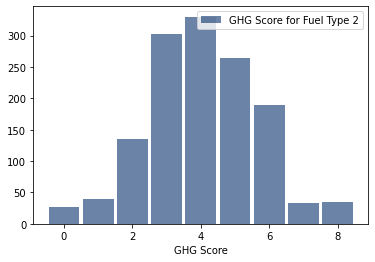

<Figure size 576x432 with 0 Axes>

In [20]:
ghgScoreA_hist_cleaned = thinkstats2.Hist(vehicle_emissions_df.ghgScoreA, label = 'GHG Score for Fuel Type 2')
thinkplot.Hist(ghgScoreA_hist_cleaned)
thinkplot.Show(xlabel = 'GHG Score', ylable = 'Frequency')

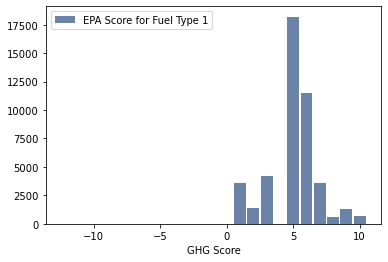

<Figure size 576x432 with 0 Axes>

In [22]:
EPA_score_hist_cleaned_type1 = thinkstats2.Hist(vehicle_emissions_df.score, label = 'EPA Score for Fuel Type 1')
thinkplot.Hist(EPA_score_hist_cleaned_type1)
thinkplot.Show(xlabel = 'GHG Score', ylable = 'Frequency')

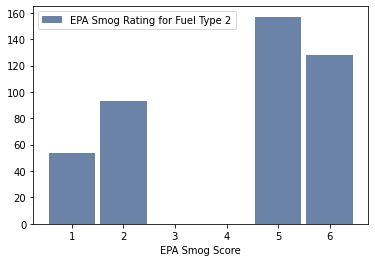

<Figure size 576x432 with 0 Axes>

In [23]:
EPA_score_hist_cleaned_type2 = thinkstats2.Hist(vehicle_emissions_df.scoreAlt, label = 'EPA Smog Rating for Fuel Type 2')
thinkplot.Hist(EPA_score_hist_cleaned_type2)
thinkplot.Show(xlabel = 'EPA Smog Score', ylable = 'Frequency')

## Analyzing the Fuel Type Variables

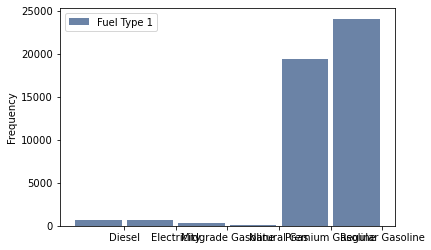

<Figure size 576x432 with 0 Axes>

In [25]:
# Let's make a histogram for fuel type 1
fuelType1_hist = thinkstats2.Hist(vehicle_emissions_df.fuelType1, label = 'Fuel Type 1')
thinkplot.Hist(fuelType1_hist)
thinkplot.Show(xlable = 'Fuel Type', ylabel = 'Frequency')

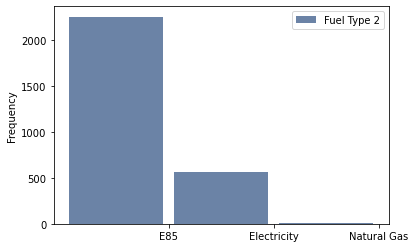

<Figure size 576x432 with 0 Axes>

In [26]:
# Histogram for fuel type 2
fuelType2_hist = thinkstats2.Hist(vehicle_emissions_df.fuelType2, label = 'Fuel Type 2')
thinkplot.Hist(fuelType2_hist)
thinkplot.Show(xlable = 'Fuel Type', ylabel = 'Frequency')

## Other Variables

A histogram won't work for the following:

- city08U (unrounded city MPG for fuelType1)
- cityA08U (unrounded city MPG for fuleType2)
- highway08U (unrounded highway MPG for fuelType1)
- highwayA08U (unrounded highway MPG for fuelType2)

This is because they are continuous variables, so each exact number would typically occur only once, or a very negligible number of times

### Miles per Gallon (hwy and city)

Let's get some descriptive statistics for MPG

In [33]:
# Mean, variance, and standard deviation for unrounded city miles per gallon for fuel type 1
city_1_mean = vehicle_emissions_df.city08U.mean()
city_1_var = vehicle_emissions_df.city08U.var()
city_1_std = vehicle_emissions_df.city08U.std()

city_1_mean, city_1_var, city_1_std

(15.30374946967492, 248.57320893910565, 15.766204645985844)

In [34]:
# Mean, variance, and standard deviation for unrounded city miles per gallon for fuel type 2
city_2_mean = vehicle_emissions_df.cityA08U.mean()
city_2_var = vehicle_emissions_df.cityA08U.var()
city_2_std = vehicle_emissions_df.cityA08U.std()

city_2_mean, city_2_var, city_2_std

(1.403250908970132, 82.63000561302731, 9.09010481859408)

In [35]:
# Mean, variance, and standard deviation for unrounded highway miles per gallon for fuel type 1
hwy_1_mean = vehicle_emissions_df.highway08U.mean()
hwy_1_var = vehicle_emissions_df.highway08U.var()
hwy_1_std = vehicle_emissions_df.highway08U.std()

hwy_1_mean, hwy_1_var, hwy_1_std

(19.77436434534246, 279.05853389624383, 16.705045162951336)

In [36]:
# Mean, variance, and standard deviation for unrounded highway miles per gallon for fuel type 2
hwy_2_mean = vehicle_emissions_df.highwayA08U.mean()
hwy_2_var = vehicle_emissions_df.highwayA08U.var()
hwy_2_std = vehicle_emissions_df.highwayA08U.std()

hwy_2_mean, hwy_2_var, hwy_2_std

(1.5817502956090406, 80.66787633447893, 8.981529732427486)

In [38]:
# Let's get the means side by side:
print('City MPG Fuel Type 1: ', city_1_mean)
print('City MPG Fuel Type 2: ', city_2_mean)
print('Hwy MPG Fuel Type 1: ', hwy_1_mean)
print('Hwy MPG Fuel Type 2: ', hwy_2_mean)

City MPG Fuel Type 1:  15.30374946967492
City MPG Fuel Type 2:  1.403250908970132
Hwy MPG Fuel Type 1:  19.77436434534246
Hwy MPG Fuel Type 2:  1.5817502956090406


## PMFs

Compare two scenarios using a PMF:

In [40]:
# Create two dataframes for EPA Smog Scores divided by score
highs = vehicle_emissions_df[vehicle_emissions_df.score >= 7]
lows = vehicle_emissions_df[vehicle_emissions_df.score <= 3]

In [41]:
# Create histograms for GHG Scores for the data frames that are divided by EPA score
highs_ghgScore_hist = thinkstats2.Hist(highs.ghgScore, label = 'GHG Score for EPA 7+')
lows_ghgScore_hist = thinkstats2.Hist(lows.ghgScore, label = 'GHG Score for EPA 3-')

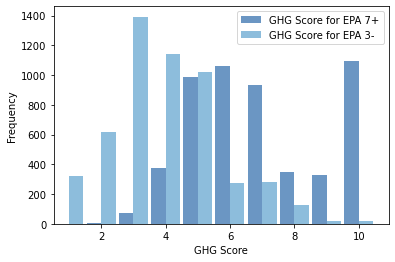

<Figure size 576x432 with 0 Axes>

In [42]:
# Side by side histograms for High EPA GHG Scores and Low EPA GHG Scores
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(highs_ghgScore_hist, align = 'right', width = width)
thinkplot.Hist(lows_ghgScore_hist, align = 'left', width = width)
thinkplot.Show(xlabel = 'GHG Score', ylabel = 'Frequency')

In [46]:
# Create PMFs for GHG Scores
GHG_highs_pmf = thinkstats2.Pmf(highs.ghgScore, label = 'High EPA Scores')
GHG_lows_pmf = thinkstats2.Pmf(lows.ghgScore, label = 'Low EPA Scores')

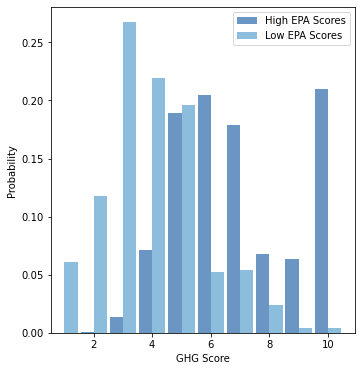

In [47]:
# Side by side PMFs for GHG Scores
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(GHG_highs_pmf, align = 'right', width = width)
thinkplot.Hist(GHG_lows_pmf, align = 'left', width = width)
thinkplot.Config(xlabel = 'GHG Score', ylabel = 'Probability')

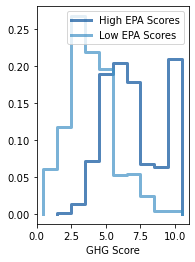

<Figure size 576x432 with 0 Axes>

In [48]:
# Another visual method for side by side PMFs
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([GHG_highs_pmf, GHG_lows_pmf])
thinkplot.Show(xlabel = 'GHG Score')

## CDFs

CDFs (or Cumulative Distribution Functions) show us the values mapped to a percentile rank. Let's compare CDFs of GHG scores divided by EPA Smog Scores.

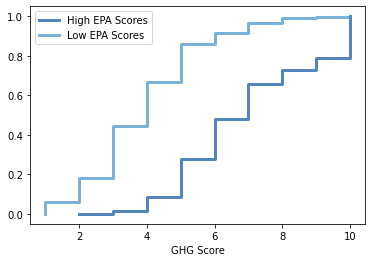

<Figure size 576x432 with 0 Axes>

In [60]:
# Creates two CDFs for GHG scores, one for records with high EPA scores and one for records with low EPA scores
GHG_highs_cdf = thinkstats2.Cdf(highs.ghgScore, label = 'High EPA Scores')
GHG_lows_cdf = thinkstats2.Cdf(lows.ghgScore, label = 'Low EPA Scores')
thinkplot.PrePlot(2)
thinkplot.Cdfs([GHG_highs_cdf, GHG_lows_cdf])
thinkplot.Show(xlabel = 'GHG Score', ylable = 'CDF')

This shows us that the distributions for high EPA smog scores tend to have very few GHG scores at or below 4, and many scores above 6. The reverse is true for low EPA smog scores.

## Analytical Distribution

Next, let's plot the complementary CDF (CCDF) for the high EPA smog score GHG scores.

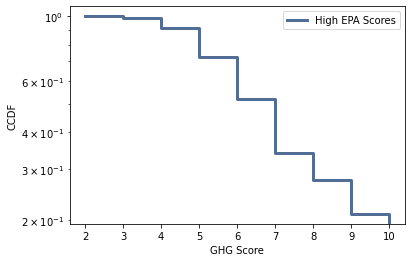

In [62]:
# Plot CCDF for GHG_highs_cdf
thinkplot.Cdf(GHG_highs_cdf, complement=True)
thinkplot.Config(
    xlabel = 'GHG Score',
    ylabel="CCDF",
    yscale="log",
    loc="upper right",)

A straight line would indicate exponential distribution. We do not have exponential distribution here.

In [71]:
GHG_scores_high = highs.ghgScore.dropna()

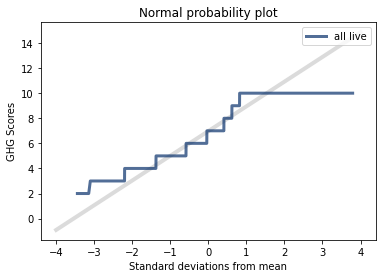

In [73]:
mean, var = thinkstats2.TrimmedMeanVar(GHG_scores_high, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(GHG_scores_high)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="GHG Scores",
)

## Scatterplots

Let's see what a scatter plot of greenhouse gas and epa smog scores looks like, to get a sense for whether there is a correlation between the two.

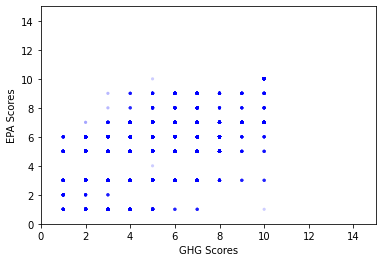

In [81]:
#A scatterplot of GHG scores and EPA Smog scores
GHG_scores = vehicle_emissions_df.ghgScore
EPA_scores = vehicle_emissions_df.score
thinkplot.Scatter(GHG_scores, EPA_scores, alpha = 0.1, s = 10)
thinkplot.Config(xlabel = 'GHG Scores', ylabel = 'EPA Scores',
                axis = [0, 15, 0, 15],
                legend = False)

It seems like there is a very slight positive correlation between these two variables, but the fact that it isn't very strong is mildly surprising.

Let's also check and see what the relationship between mpg and model year looks like.

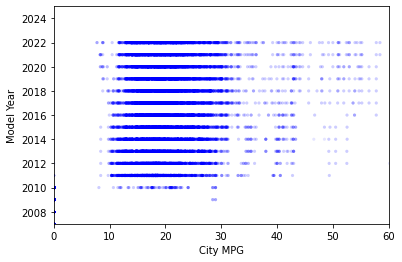

In [80]:
# A scatterplot for model year and city miles per gallon
thinkplot.Scatter(city_miles_1, model_year, alpha = 0.1, s = 10)
thinkplot.Config(xlabel = 'City MPG',
                ylabel = 'Model Year',
                axis = [0, 60, 2007, 2025],
                legend = False)

This is very interesting - we can see clearly if we look at the right side of the graph that there are more efficient cars as the years go on, BUT we continue making inefficient cars at as fast a rate as we used to (see the darker sections).

Lastly, let's see if there is a relationship between City MPG and Highway MPG.

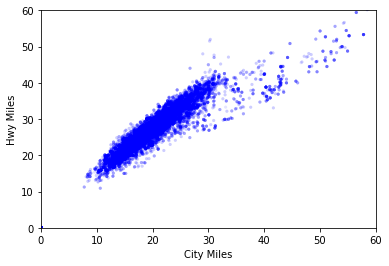

In [82]:
# A scatterplot of city mpg and hwy mpg
thinkplot.Scatter(city_miles_1, hwy_miles_1, alpha=0.1, s=10)
thinkplot.Config(xlabel='City Miles',
                 ylabel='Hwy Miles',
                 axis=[0, 60, 0, 60],
                 legend=False)

Here we see what is most likely a strong positive correlation between City MPG and Highway MPG. As cars get more miles to the gallon in the city, they get more miles to the gallon on the highway. It's interesting how the slope seems to decrease once 30 City MPG is surpassed. 

## Correlation Test

Let's test to see if there is a correlation between GHG scores and EPA smog scores.

In [88]:
cleaned_vehicle_emissions_df = vehicle_emissions_df.dropna(subset=['ghgScore', 'score'])
data = cleaned_vehicle_emissions_df.ghgScore.values, cleaned_vehicle_emissions_df.score.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

A p-value of 0.0 indicates that there is no statistically significant relationship between greenhouse gas scores and epa smog scores. This was surprising because one would assume that a vehicle with a positive (high) scores for ghg scores would have positive (high) epa smog scores, since they are both essentially measuring the enivornmental-friendliness of a vehicle.

## Regression Test

In [93]:
import statsmodels.formula.api as smf

formula = 'ghgScore ~ score'
model = smf.ols(formula, data = vehicle_emissions_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ghgScore   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:44:16   Log-Likelihood:                -50621.
No. Observations:               26225   AIC:                         1.012e+05
Df Residuals:                   26223   BIC:                         1.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9882      0.033     60.780      0.000       1.924       2.052
score          0.5871      0.006    100.936      0.000       0.576       0.598
==============================================================================
Omnibus:                      395.713   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.677
Skew:                           0.307   Prob(JB):                     1.48e-90
Kurtosis:                       2.981   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""